Frequency of Administrative Page Views:
0     5768
1     1354
2     1114
3      915
4      765
5      575
6      432
7      338
8      287
9      225
10     153
11     105
12      86
13      56
14      44
15      38
16      24
17      16
18      12
19       6
20       2
21       2
22       4
23       3
24       4
26       1
27       1
Name: Administrative, dtype: int64

Range of Administrative Page Views:
Minimum: 0
Maximum: 27
Range: 27


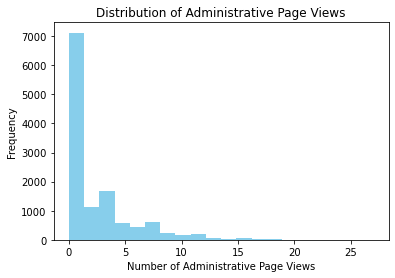

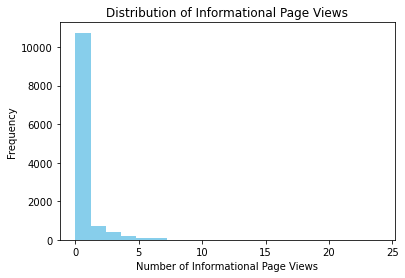

Frequency of Informational Page Views:
0     9699
1     1041
2      728
3      380
4      222
5       99
6       78
7       36
8       14
9       15
10       7
11       1
12       5
13       1
14       2
16       1
24       1
Name: Informational, dtype: int64

Range of Informational Page Views:
Minimum: 0
Maximum: 24
Range: 24
Frequency of Page Values:
0.000000      9600
0.038035         1
0.067050         1
0.093547         1
0.098621         1
              ... 
261.491286       1
270.784693       1
287.953793       1
360.953384       1
361.763742       1
Name: PageValues, Length: 2704, dtype: int64

Range of Page Values:
Minimum: 0.0
Maximum: 361.7637419
Range: 361.7637419


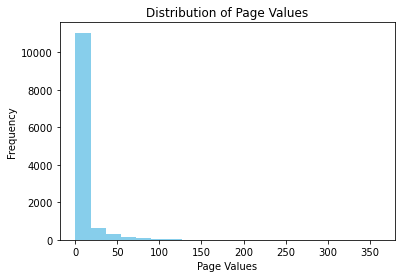

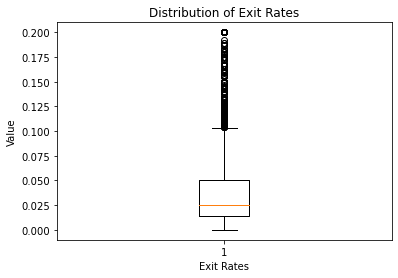

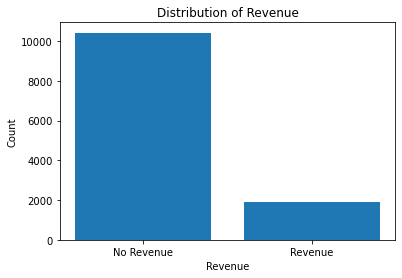

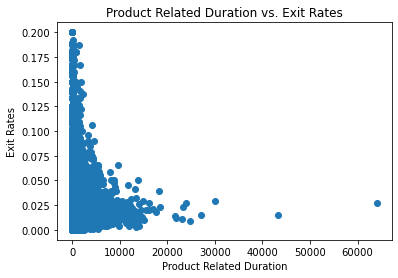

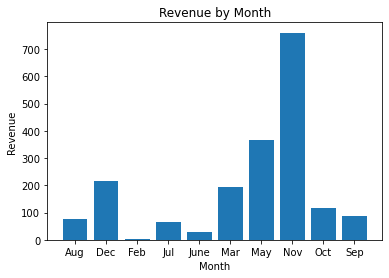

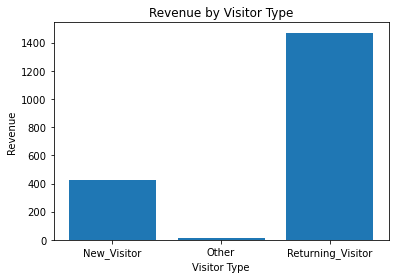

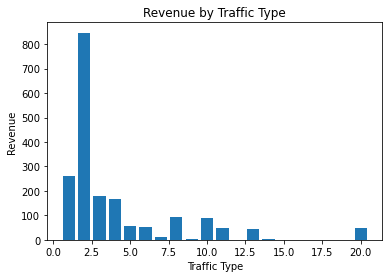

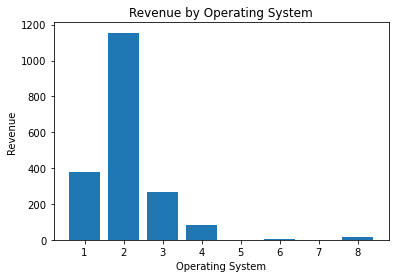

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("C:/Users/hp/Downloads/online_shoppers_intention.csv")

df = df[['Administrative', 'Informational','ProductRelated_Duration','PageValues','ExitRates','OperatingSystems','TrafficType','VisitorType','Revenue','Month']]

missing_values = df.isnull().sum()
missing_values


## Data Exploration
## Distribution of Administrative Page Views
administrative_views = df['Administrative']
plt.hist(administrative_views, bins=20, color='skyblue')
plt.xlabel('Number of Administrative Page Views')
plt.ylabel('Frequency')
plt.title('Distribution of Administrative Page Views')
frequency = administrative_views.value_counts().sort_index()
minimum = administrative_views.min()
maximum = administrative_views.max()
range_admin_views = maximum - minimum
print("Frequency of Administrative Page Views:")
print(frequency)
print("\nRange of Administrative Page Views:")
print("Minimum:", minimum)
print("Maximum:", maximum)
print("Range:", range_admin_views)
plt.show()

## Distribution of Informational Page Views
informational_views = df['Informational']
plt.hist(informational_views, bins=20, color='skyblue')
plt.xlabel('Number of Informational Page Views')
plt.ylabel('Frequency')
plt.title('Distribution of Informational Page Views')
plt.show()
frequency = informational_views.value_counts().sort_index()
minimum = informational_views.min()
maximum = informational_views.max()
range_info_views = maximum - minimum
print("Frequency of Informational Page Views:")
print(frequency)
print("\nRange of Informational Page Views:")
print("Minimum:", minimum)
print("Maximum:", maximum)
print("Range:", range_info_views)
plt.show()

## Distribution of Page Values
page_values = df['PageValues']
plt.hist(page_values, bins=20, color='skyblue')
plt.xlabel('Page Values')
plt.ylabel('Frequency')
plt.title('Distribution of Page Values')
frequency = page_values.value_counts().sort_index()
minimum = page_values.min()
maximum = page_values.max()
range_page_values = maximum - minimum
print("Frequency of Page Values:")
print(frequency)
print("\nRange of Page Values:")
print("Minimum:", minimum)
print("Maximum:", maximum)
print("Range:", range_page_values)
plt.show()

##Distribution of Exit Rates
exit_rates = df['ExitRates']
plt.boxplot(exit_rates)
plt.xlabel('Exit Rates')
plt.ylabel('Value')
plt.title('Distribution of Exit Rates')
plt.show()

##Distribution of Revenue
revenue_counts = df['Revenue'].value_counts()
plt.bar(['No Revenue', 'Revenue'], revenue_counts)
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.title('Distribution of Revenue')
plt.show()

##Product Related Duration vs. Exit Rates
product_duration = df['ProductRelated_Duration']
exit_rates = df['ExitRates']
plt.scatter(product_duration, exit_rates)
plt.xlabel('Product Related Duration')
plt.ylabel('Exit Rates')
plt.title('Product Related Duration vs. Exit Rates')
plt.show()

## Revenue by Month
months = df['Month']
revenue = df['Revenue']
monthly_revenue = df.groupby('Month')['Revenue'].sum()
plt.bar(monthly_revenue.index, monthly_revenue)
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Revenue by Month')
plt.show()

##Revenue by Visitor Type
visitor_type = df['VisitorType']
revenue = df['Revenue']
revenue_by_visitor_type = df.groupby('VisitorType')['Revenue'].sum()
plt.bar(revenue_by_visitor_type.index, revenue_by_visitor_type)
plt.xlabel('Visitor Type')
plt.ylabel('Revenue')
plt.title('Revenue by Visitor Type')
plt.show()

##Revenue by Traffic Type
traffic_type = df['TrafficType']
revenue = df['Revenue']
revenue_by_traffic_type = df.groupby('TrafficType')['Revenue'].sum()
plt.bar(revenue_by_traffic_type.index, revenue_by_traffic_type)
plt.xlabel('Traffic Type')
plt.ylabel('Revenue')
plt.title('Revenue by Traffic Type')
plt.show()

##Revenue by Operating System
operating_system = df['OperatingSystems']
revenue = df['Revenue']
revenue_by_os = df.groupby('OperatingSystems')['Revenue'].sum()
plt.bar(revenue_by_os.index, revenue_by_os)
plt.xlabel('Operating System')
plt.ylabel('Revenue')
plt.title('Revenue by Operating System')
plt.show()

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(df.head())
print(df.info())
print(df['Revenue'].value_counts())

data = df.dropna(inplace=True)
data
X = df.drop('Revenue', axis=1)
y = df['Revenue']

X_encoded = pd.get_dummies(X, columns=['VisitorType', 'Month'])

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
model1 = DecisionTreeClassifier()
model2 = RandomForestClassifier()

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)

accuracy1 = accuracy_score(y_test, y_pred1)
precision1 = precision_score(y_test, y_pred1)
recall1 = recall_score(y_test, y_pred1)
f1_score1 = f1_score(y_test, y_pred1)

accuracy2 = accuracy_score(y_test, y_pred2)
precision2 = precision_score(y_test, y_pred2)
recall2 = recall_score(y_test, y_pred2)
f1_score2 = f1_score(y_test, y_pred2)

print("Model 1:")
print("Accuracy:", accuracy1)
print("Precision:", precision1)
print("Recall:", recall1)
print("F1-score:", f1_score1)

print("\nModel 2:")
print("Accuracy:", accuracy2)
print("Precision:", precision2)
print("Recall:", recall2)
print("F1-score:", f1_score2)

if accuracy1 > accuracy2:
    print("Model 1 performs better.")
else:
    print("Model 2 performs better.")

   Administrative  Informational  ProductRelated_Duration  PageValues  \
0               0              0                 0.000000         0.0   
1               0              0                64.000000         0.0   
2               0              0                 0.000000         0.0   
3               0              0                 2.666667         0.0   
4               0              0               627.500000         0.0   

   ExitRates  OperatingSystems  TrafficType        VisitorType  Revenue Month  
0       0.20                 1            1  Returning_Visitor    False   Feb  
1       0.10                 2            2  Returning_Visitor    False   Feb  
2       0.20                 4            3  Returning_Visitor    False   Feb  
3       0.14                 3            4  Returning_Visitor    False   Feb  
4       0.05                 3            4  Returning_Visitor    False   Feb  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data 